In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/CR2500Kv2/cosmic_g4_0000.root'

In [3]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [4]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,0.861626,-2681.757432,-150.852231,6997.713086,0,0,13,6976.043919,-2683.434573,-150.263857,7000.000000,3
1,7.736121,-2667.889713,-155.716385,6978.816076,0,0,13,6974.069660,-2681.757432,-150.852231,6997.713086,3
2,9.858480,-2651.625309,-161.397789,6956.713369,0,0,13,6965.771188,-2667.889713,-155.716385,6978.816076,3
3,2.050359,-2647.988485,-162.680318,6951.770069,0,0,13,6953.065740,-2651.625309,-161.397789,6956.713369,3
4,20.661658,-2613.530215,-174.848650,6904.934507,0,0,13,6948.035283,-2647.988485,-162.680318,6951.770069,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8598627,0.641306,3458.752122,4595.059596,6899.227844,999,1,11,2.095201,3458.788589,4595.367874,6900.738436,3234
8598628,0.558718,3459.265063,4595.798249,6899.297809,999,1,11,1.453895,3458.752122,4595.059596,6899.227844,3234
8598629,0.384178,3459.419628,4595.605211,6899.365485,999,1,11,0.895177,3459.265063,4595.798249,6899.297809,3234
8598630,0.533089,3501.465783,4566.697506,6985.352743,999,1,11,1.345447,3501.661418,4565.995948,6985.622051,3233


In [5]:
# unit in mm, half the dimension
# Fiducial volume
FX = 250.
FY = 200.
FZ = 250.
# TPC volume
TPCX = 300.
TPCY = 250.
TPCZ = 300.

In [6]:
edf = df[np.abs(df.pdg)==11]

In [7]:
edfF = edf[(np.abs(edf.startX) <= FX) & (np.abs(edf.startY) <= FY) & (np.abs(edf.startZ) <= FZ) & \
        (np.abs(edf.endX) <= FX) & (np.abs(edf.endY) <= FY) & (np.abs(edf.endZ) <= FZ)]
edfF

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
529422,1.126890,247.921721,-18.975264,214.127951,60,2,11,5.221303,246.950940,-17.916546,219.655654,531
529423,0.585422,245.804131,-18.010336,212.329435,60,2,11,4.094413,247.921721,-18.975264,214.127951,531
529424,0.780502,243.918303,-20.729063,213.676035,60,2,11,3.345715,245.804131,-18.010336,212.329435,531
529425,0.589391,245.839688,-22.217728,214.721377,60,2,11,2.565213,243.918303,-20.729063,213.676035,531
529426,0.336647,247.266903,-23.012153,215.086000,60,2,11,1.975822,245.839688,-22.217728,214.721377,531
529427,0.417144,248.348850,-23.931793,215.376205,60,2,11,1.631034,247.266903,-23.012153,215.086000,531
529428,0.309629,248.675777,-24.571006,215.809903,60,2,11,1.213891,248.348850,-23.931793,215.376205,531
529429,0.344447,249.028740,-24.672714,215.777802,60,2,11,0.904262,248.675777,-24.571006,215.809903,531
529430,0.048816,249.025201,-24.673567,215.766856,60,2,11,0.559815,249.028740,-24.672714,215.777802,531
529432,0.004935,247.295622,-23.043382,215.093937,60,922,11,0.515934,247.295408,-23.043425,215.093925,923


In [8]:
edfEdge1 = edf[(np.abs(edf.startX) <= FX) & (np.abs(edf.startY) <= FY) & (np.abs(edf.startZ) <= FZ) & \
            ((np.abs(edf.endX) > FX) | (np.abs(edf.endY) > FY) | (np.abs(edf.endZ) > FZ))]
edfEdge1

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
529437,1.660304,251.378222,-18.389672,217.691559,60,2,11,7.871507,244.834601,-18.171587,223.339465,530


In [9]:
edfEdge2 = edf[((np.abs(edf.startX) > FX) | (np.abs(edf.startY) > FY) | (np.abs(edf.startZ) > FZ)) & \
            (np.abs(edf.endX) <= FX) & (np.abs(edf.endY) <= FY) & (np.abs(edf.endZ) <= FZ)]
edfEdge2

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
529486,0.492085,229.159438,-19.073095,249.295251,60,2,11,1.526809,229.185218,-19.866217,250.328981,529


In [10]:
edfOut = edf[~((np.abs(edf.startX) <= FX) & (np.abs(edf.startY) <= FY) & (np.abs(edf.startZ) <= FZ) & \
             (np.abs(edf.endX) <= FX) & (np.abs(edf.endY) <= FY) & (np.abs(edf.endZ) <= FZ)) & \
             (np.abs(edf.startX) <= TPCX) & (np.abs(edf.startY) <= TPCY) & (np.abs(edf.startZ) <= TPCZ) & \
             (np.abs(edf.endX) <= TPCX) & (np.abs(edf.endY) <= TPCY) & (np.abs(edf.endZ) <= TPCZ)]
edfOut

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
529420,0.275397,276.411829,-14.305517,169.670296,60,2,11,1.017615,275.877614,-14.351604,169.719839,532
529421,0.231220,276.421573,-14.465425,169.656735,60,2,11,0.742219,276.411829,-14.305517,169.670296,532
529437,1.660304,251.378222,-18.389672,217.691559,60,2,11,7.871507,244.834601,-18.171587,223.339465,530
529438,0.821328,255.425103,-19.152825,215.770462,60,2,11,6.211203,251.378222,-18.389672,217.691559,530
529439,0.964973,260.324469,-18.130673,214.491323,60,2,11,5.384087,255.425103,-19.152825,215.770462,530
...,...,...,...,...,...,...,...,...,...,...,...,...
4797568,0.020066,226.200815,202.704572,36.404459,566,1242,11,0.531065,226.202690,202.703186,36.405070,1261
4797569,0.003477,257.790957,137.879421,29.624951,566,1242,11,0.514476,257.791032,137.879496,29.624888,1260
4797570,0.004277,288.899915,116.563679,14.188385,566,1242,11,0.515276,288.899879,116.563601,14.188535,1259
4797571,0.079855,290.698095,114.283429,14.643282,566,1242,11,0.590854,290.679151,114.302894,14.643976,1258


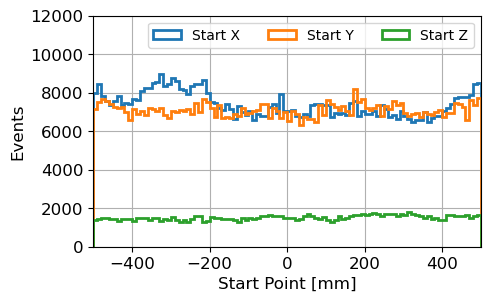

In [11]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(df.startX, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'Start X')
ax.hist(df.startY, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'Start Y')
ax.hist(df.startZ, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'Start Z')

ax.set_xlabel( r'Start Point [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [-500., 500.])
ax.set_ylim( [0, 12000])

ax.grid(":")
ax.legend( ncol = 3)

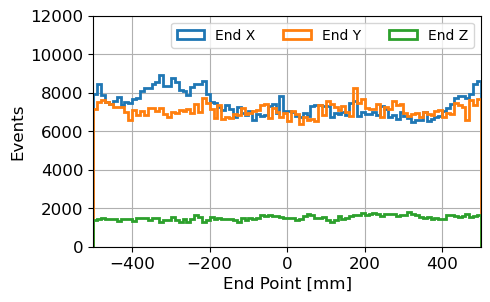

In [12]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(df.endX, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'End X')
ax.hist(df.endY, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'End Y')
ax.hist(df.endZ, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'End Z')

ax.set_xlabel( r'End Point [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [-500, 500])
ax.set_ylim( [0, 12000])

ax.grid(":")
ax.legend( ncol = 3)

In [13]:
ActiveVolume = ( ( -300.0, +300.0 ), ( -250.0, +250.0 ), ( -300.0, +300.0 ) )
def selInActiveVolume(colX, colY, colZ):
    return df[colX].between(*ActiveVolume[0]) & df[colY].between(*ActiveVolume[1]) & df[colZ].between(*ActiveVolume[2])

In [14]:
def particleLength( startX, startY, startZ, endX, endY, endZ ):
    start = np.array([ startX, startY, startZ ])
    end = np.array([ endX, endY, endZ ])
    return np.sqrt( np.sum([ dL**2 for dL in end-start ]) )

In [15]:
# Caveat: select the steps with either the start or the end point in the active volume
muInActive = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(np.abs(df.pdg)==13)]
eInActive = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(np.abs(df.pdg)==11)]

In [16]:
muInActive

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
528443,16.459318,213.467573,-21.775468,277.949392,60,0,13,1271.643943,166.908363,-27.316712,360.646605,2
528444,4.493294,226.553381,-20.148679,254.890964,60,0,13,1249.803770,213.467573,-21.775468,277.949392,2
528445,0.097115,226.796911,-20.122289,254.468916,60,0,13,1244.962637,226.553381,-20.148679,254.890964,2
528446,0.621720,228.299587,-19.962064,251.864214,60,0,13,1244.456710,226.796911,-20.122289,254.468916,2
528447,0.278653,229.185218,-19.866217,250.328981,60,0,13,1243.258721,228.299587,-19.962064,251.864214,2
528448,5.803360,244.834601,-18.171587,223.339465,60,0,13,1241.964258,229.185218,-19.866217,250.328981,2
528449,0.758054,246.950940,-17.916546,219.655654,60,0,13,1228.800390,244.834601,-18.171587,223.339465,2
528450,10.605451,275.877614,-14.351604,169.719839,60,0,13,1223.332032,246.950940,-17.916546,219.655654,2
528451,9.038903,300.668446,-11.181270,126.493904,60,0,13,1212.219964,275.877614,-14.351604,169.719839,2
3065718,14.323594,-297.499121,-58.132065,275.475212,364,0,13,4903.953531,-259.881157,-79.599050,335.449486,3


In [17]:
eInActive

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
529420,0.275397,276.411829,-14.305517,169.670296,60,2,11,1.017615,275.877614,-14.351604,169.719839,532
529421,0.231220,276.421573,-14.465425,169.656735,60,2,11,0.742219,276.411829,-14.305517,169.670296,532
529422,1.126890,247.921721,-18.975264,214.127951,60,2,11,5.221303,246.950940,-17.916546,219.655654,531
529423,0.585422,245.804131,-18.010336,212.329435,60,2,11,4.094413,247.921721,-18.975264,214.127951,531
529424,0.780502,243.918303,-20.729063,213.676035,60,2,11,3.345715,245.804131,-18.010336,212.329435,531
...,...,...,...,...,...,...,...,...,...,...,...,...
6788125,0.073977,132.768757,27.142283,188.791788,796,3343,11,0.584976,132.792517,27.140832,188.792208,3534
6788126,0.004600,167.490526,38.840600,204.387818,796,3343,11,0.515599,167.490434,38.840472,204.387932,3533
6788127,0.018890,179.422559,34.991998,228.814938,796,3343,11,0.529888,179.421639,34.992768,228.813131,3532
6788128,0.034923,175.519125,46.652274,221.923254,796,3343,11,0.545922,175.517775,46.649359,221.928796,3531


In [18]:
muL = np.array([ particleLength( row.startX, row.startY, row.startZ, row.endX, row.endY, row.endZ)  for row in muInActive.itertuples( index = False) ])

In [19]:
muL.max()

204.4918679566196

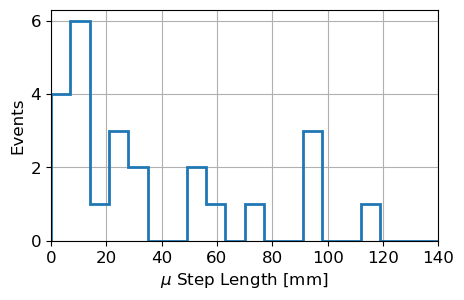

In [20]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(muL, bins = np.linspace(0, 140, 21), histtype = 'step', lw = 2)

ax.set_xlabel( r'$\mu$ Step Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 140])

ax.grid(":")

In [21]:
eL = np.array([ particleLength( row.startX, row.startY, row.startZ, row.endX, row.endY, row.endZ)  for row in eInActive.itertuples( index = False) ])

In [22]:
eL.max()

16.445303058988056

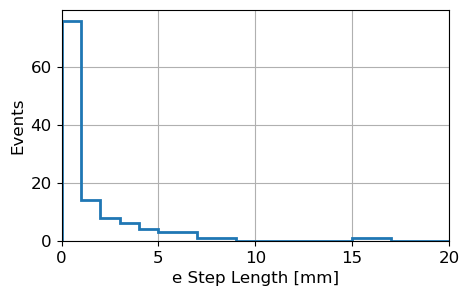

In [23]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(eL, bins = np.linspace(0, 20, 21), histtype = 'step', lw = 2)

ax.set_xlabel( r'e Step Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 20])

ax.grid(":")

In [24]:
pInActive = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(np.abs(df.pdg)==2212)]

In [25]:
pInActive

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [26]:
topMask = (((df.startZ<=635)&(df.endZ>=605))|((df.startZ>=605)&(df.endZ<=635)))&(df.startX.abs()<=500)&(df.startY.abs()<=500)&(df.endX.abs()<=500)&(df.endY.abs()<=500)

In [27]:
crtTop = df[topMask&(df.dE>0.)].groupby('event')

In [28]:
crtTop.dE.sum().max()

11.101328413096244

In [29]:
crtTop.dE.sum().min()

0.007804346740073381

In [30]:
crtTopE = crtTop.dE.sum()
crtTopE[crtTopE>1]

event
60      5.468903
66      5.619280
197     5.324843
318     5.808109
364    11.101328
390     5.847214
439     3.713777
480     5.702259
504     7.214945
732     5.995017
753     5.318196
778     6.695596
787     5.939015
810     6.210411
825     1.284741
849     7.870343
860     6.271216
Name: dE, dtype: float64

In [31]:
crtTop.dE.sum()

event
60      5.468903
66      5.619280
197     5.324843
217     0.024135
237     0.070119
318     5.808109
333     0.008213
364    11.101328
390     5.847214
439     3.713777
480     5.702259
504     7.214945
732     5.995017
753     5.318196
778     6.695596
787     5.939015
796     0.007804
810     6.210411
825     1.284741
849     7.870343
860     6.271216
Name: dE, dtype: float64

In [32]:
i = 60
crtTop.get_group(i)

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
528429,5.468903e+00,31.642979,-44.130000,605.0,60,0,13,1339.062918,14.817262,-46.265337,635.0,2
528430,1.633499e-25,34.406344,-43.782907,600.0,60,0,13,1333.594015,31.642979,-44.130000,605.0,2


In [33]:
crtTop.groups.keys()

dict_keys([60, 66, 197, 217, 237, 318, 333, 364, 390, 439, 480, 504, 732, 753, 778, 787, 796, 810, 825, 849, 860])

In [34]:
if i in crtTop.groups.keys():
    print('Found a hit!')

Found a hit!


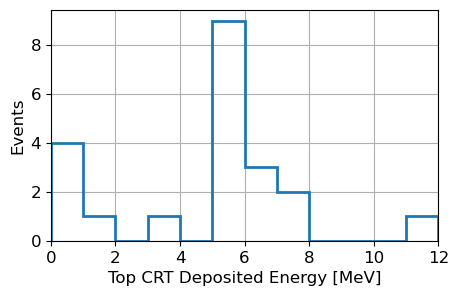

In [35]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(crtTop.dE.sum(), bins = np.linspace(0, 12, 13), histtype = 'step', lw = 2)

ax.set_xlabel( r'Top CRT Deposited Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0., 12])

ax.grid(":")

In [36]:
frontMask = (((df.startY<=-505)&(df.endY>=-535))|((df.startY>=-535)&(df.endY<=-505)))&(df.startX.abs()<=500)&(df.startZ.abs()<=600)&(df.endX.abs()<=500)&(df.endZ.abs()<=600)

In [37]:
crtFront = df[frontMask&(df.dE>0.)].groupby('event')

In [38]:
crtFront.dE.sum().max()

25.489628581651818

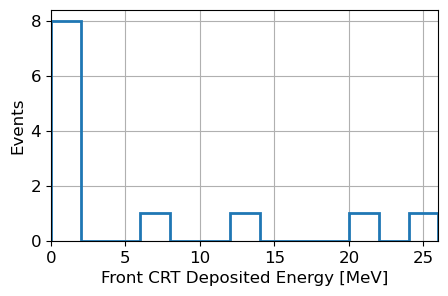

In [39]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(crtFront.dE.sum(), bins = np.linspace(0, 26, 14), histtype = 'step', lw = 2)

ax.set_xlabel( r'Front CRT Deposited Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0., 26])
# ax.set_ylim( [0, 12000])

ax.grid(":")

In [40]:
# pd.set_option('display.max_rows', None)
df[frontMask&(df.dE>0.)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
702383,3.583751,-443.738755,-512.366307,586.505432,81,0,13,1615.383317,-436.334263,-518.343167,600.000000,2
702384,3.573534,-452.913862,-505.000000,569.870488,81,0,13,1611.081881,-443.738755,-512.366307,586.505432,2
703150,0.312034,-443.315125,-512.375208,585.144103,81,2,11,1.228684,-443.738755,-512.366307,586.505432,448
703151,0.361187,-443.201279,-512.771478,584.518548,81,2,11,0.916650,-443.315125,-512.375208,585.144103,448
703152,0.044464,-443.184166,-512.779234,584.518760,81,2,11,0.555463,-443.201279,-512.771478,584.518548,448
...,...,...,...,...,...,...,...,...,...,...,...,...
6920695,0.192455,440.252574,-505.406434,-379.810845,810,3,11,1.343441,440.745729,-505.592849,-379.394831,255
6920696,0.122570,439.651698,-505.542155,-380.210863,810,3,11,1.150987,440.252574,-505.406434,-379.810845,255
6920697,0.264975,439.330716,-505.634114,-380.716487,810,3,11,1.028417,439.651698,-505.542155,-380.210863,255
6920698,0.252444,439.297514,-505.862308,-380.995621,810,3,11,0.763443,439.330716,-505.634114,-380.716487,255


In [41]:
backMask = (((df.startY>=505)&(df.endY<=535))|((df.startY<=535)&(df.endY>=505)))&(df.startX.abs()<=500)&(df.startZ.abs()<=600)&(df.endX.abs()<=500)&(df.endZ.abs()<=600)

In [42]:
df[backMask&(df.dE>0)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
79473,1.903005e-24,-30.637772,535.000000,-53.558861,9,3,11,6.214414,-16.478251,600.000000,-47.206500,197
79474,1.224347e+00,-30.799912,527.378251,-54.011847,9,3,11,6.214414,-30.637772,535.000000,-53.558861,197
79475,1.090202e+00,-28.758968,521.622670,-52.764608,9,3,11,4.990067,-30.799912,527.378251,-54.011847,197
79476,6.210187e-01,-28.195345,518.056265,-51.094714,9,3,11,3.899865,-28.758968,521.622670,-52.764608,197
79477,6.179095e-01,-28.465727,514.279299,-49.663965,9,3,11,3.239177,-28.195345,518.056265,-51.094714,197
...,...,...,...,...,...,...,...,...,...,...,...,...
7357577,3.731544e-01,259.026085,514.478194,179.327659,860,475,11,1.347581,257.472720,514.077518,179.605245,476
7357578,3.379145e-01,258.867588,514.002519,178.582959,860,475,11,0.974427,259.026085,514.478194,179.327659,476
7357579,1.255134e-01,258.878315,514.053352,178.480446,860,475,11,0.636512,258.867588,514.002519,178.582959,476
7680448,2.008878e-04,443.080738,533.331240,-553.705825,896,1370,11,0.511200,443.080738,533.331242,-553.705826,1391


In [43]:
leftMask = (((df.startX<=-505)&(df.endX>=-535))|((df.startX>=-535)&(df.endX<=-505)))&(df.startY.abs()<=500)&(df.startZ.abs()<=600)&(df.endY.abs()<=500)&(df.endZ.abs()<=600)

In [44]:
df[leftMask&(df.dE>0)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
702386,11.111246,-535.000000,-439.050353,420.846354,81,0,13,1607.508347,-505.000000,-463.152954,475.310166,2
1781905,0.003289,-525.108345,-119.565812,148.923328,207,3417,11,0.514287,-525.108227,-119.565714,148.923420,3529
1781906,0.006761,-531.475620,-108.634933,203.590544,207,3417,11,0.517760,-531.475963,-108.634689,203.590062,3528
1781913,0.025377,-525.769216,231.777080,31.407897,207,3417,11,0.536376,-525.766196,231.770981,31.408911,3521
2835725,2.703975,-530.800583,-11.193056,-391.746510,336,0,13,18159.247173,-535.000000,-16.844216,-378.179857,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7247768,0.429738,-518.267873,473.772961,-250.902214,849,2,11,1.736383,-516.722501,475.301338,-250.584884,575
7247769,0.484217,-519.690035,473.723197,-251.542946,849,2,11,1.306645,-518.267873,473.772961,-250.902214,575
7247770,0.311429,-519.985484,473.875088,-251.920586,849,2,11,0.822427,-519.690035,473.723197,-251.542946,575
7551029,0.007361,-524.398658,-309.352159,162.023904,878,4059,11,0.518359,-524.398983,-309.352829,162.023908,4099


In [45]:
rightMask = (((df.startX>=505)&(df.endX<=535))|((df.startX<=535)&(df.endX>=505)))&(df.startY.abs()<=500)&(df.startZ.abs()<=600)&(df.endY.abs()<=500)&(df.endZ.abs()<=600)

In [46]:
df[rightMask&(df.dE>0)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
528469,2.512859e-24,505.000000,23.595762,-226.896700,60,0,13,1064.368232,459.724188,15.927060,-149.603840,2
528470,6.050206e-01,506.905824,23.918566,-230.150238,60,0,13,1064.368232,505.000000,23.595762,-226.896700,2
528471,1.693757e-02,506.985362,23.932022,-230.286136,60,0,13,1062.919384,506.905824,23.918566,-230.150238,2
528472,2.432186e-01,507.824969,24.074373,-231.723332,60,0,13,1061.941432,506.985362,23.932022,-230.286136,2
528473,2.276876e+00,514.068849,25.134509,-242.397254,60,0,13,1059.031813,507.824969,24.074373,-231.723332,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6788134,3.942106e-01,513.948412,437.317295,296.579750,796,3343,11,1.547665,515.223664,436.115499,297.396398,3527
6788135,4.560349e-01,513.486940,437.319638,295.379971,796,3343,11,1.153454,513.948412,437.317295,296.579750,3527
6788136,1.864203e-01,513.604322,437.494446,295.309066,796,3343,11,0.697419,513.486940,437.319638,295.379971,3527
7188409,3.131998e-02,515.901718,-293.567335,428.707553,842,1841,11,0.542319,515.895017,-293.560283,428.710042,1980


In [47]:
bottomMask = (((df.startZ>=-635)&(df.endZ<=-605))|((df.startZ<=-605)&(df.endZ>=-635)))&(df.startX.abs()<=500)&(df.startY.abs()<=500)&(df.endX.abs()<=500)&(df.endY.abs()<=500)

In [48]:
df[bottomMask&(df.dE>0)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
2835730,3.791274e+00,-458.956244,85.543693,-623.841386,336,0,13,18135.615137,-464.788244,77.690909,-605.000000,1
2835731,2.370285e+00,-455.500289,90.195953,-635.000000,336,0,13,18131.175863,-458.956244,85.543693,-623.841386,1
2835732,2.045957e-25,-453.952392,92.281030,-640.000000,336,0,13,18128.805578,-455.500289,90.195953,-635.000000,1
2837814,3.635748e-01,-459.657584,86.244722,-624.676147,336,1,11,1.158999,-458.956244,85.543693,-623.841386,3449
2837815,2.844249e-01,-459.949848,86.258636,-625.000493,336,1,11,0.795424,-459.657584,86.244722,-624.676147,3449
3281215,4.093300e-24,36.802977,-486.629015,-605.000000,390,0,13,5762.665161,47.502776,-457.540694,-484.238434,2
3281216,1.459046e+00,36.010285,-488.784019,-613.946599,390,0,13,5762.665161,36.802977,-486.629015,-605.000000,2
3281217,3.882084e+00,34.157942,-493.851389,-635.000000,390,0,13,5756.185464,36.010285,-488.784019,-613.946599,2
3281218,1.694204e-25,33.715492,-495.052039,-640.000000,390,0,13,5752.303380,34.157942,-493.851389,-635.000000,2
3282604,1.276374e+00,33.763278,-493.211460,-618.672837,390,2,11,5.531651,36.010285,-488.784019,-613.946599,540
